# Analysis on Company attrition dataset

In [3]:
## Loading Relevant libraries and the dataset

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler



In [2]:
df=pd.read_csv("train.csv")


In [ ]:
df.head()

In [4]:
df.dtypes

Id                          int64
Age                         int64
Attrition                   int64
BusinessTravel             object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                     object
JobInvolvement              int64
JobRole                    object
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                   object
PercentSalaryHike           int64
PerformanceRating           int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
CommunicationSkill          int64
Behaviour                   int64
dtype: object

In [5]:
## Since the analysis can be performed on the numeric datatypes, converting the object to numeric datatype using label encoder

labelencoder= LabelEncoder()
df['BusinessTravel'] = labelencoder.fit_transform(df['BusinessTravel'])
df['Department'] = labelencoder.fit_transform(df['Department'])
df['EducationField'] = labelencoder.fit_transform(df['EducationField'])
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['JobRole'] = labelencoder.fit_transform(df['JobRole'])
df['MaritalStatus'] = labelencoder.fit_transform(df['MaritalStatus'])
df['OverTime'] = labelencoder.fit_transform(df['OverTime'])

In [8]:
X.dtypes

Age                        int64
BusinessTravel             int32
Department                 int32
DistanceFromHome           int64
Education                  int64
EducationField             int32
EnvironmentSatisfaction    int64
Gender                     int32
JobInvolvement             int64
JobRole                    int32
JobSatisfaction            int64
MaritalStatus              int32
MonthlyIncome              int64
NumCompaniesWorked         int64
OverTime                   int32
PercentSalaryHike          int64
PerformanceRating          int64
StockOptionLevel           int64
TotalWorkingYears          int64
TrainingTimesLastYear      int64
YearsAtCompany             int64
YearsInCurrentRole         int64
YearsSinceLastPromotion    int64
YearsWithCurrManager       int64
CommunicationSkill         int64
Behaviour                  int64
dtype: object

In [7]:
## The Id and EmployeeNumber features have no predictive hence they are been dropped
## The Attrition is the target variable
X= df.drop(['Attrition','Id','EmployeeNumber'],axis=1)
X.shape

(1628, 26)

In [9]:
X_copy= X.copy()
X_copy

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,30,0,1,2,3,3,3,0,3,2,...,3,0,12,2,11,7,6,7,4,1
1,36,2,1,12,4,1,3,0,3,4,...,3,2,7,2,3,2,1,1,2,1
2,55,2,2,2,1,3,3,1,3,7,...,3,0,12,3,9,7,7,3,5,1
3,39,2,1,24,1,1,1,1,3,6,...,3,0,18,2,7,7,1,7,4,1
4,37,2,1,3,3,4,3,1,3,4,...,3,1,10,2,10,7,7,8,1,1
5,31,2,2,7,4,1,2,1,2,8,...,3,0,13,2,7,7,5,2,2,1
6,32,2,1,1,3,1,4,1,2,2,...,3,0,4,2,3,2,1,2,1,1
7,33,2,1,4,4,3,1,0,2,2,...,3,0,8,5,5,4,0,2,5,1
8,35,1,2,11,2,2,4,1,3,7,...,3,1,5,3,5,2,0,2,4,1
9,21,2,2,7,1,2,2,1,3,8,...,3,0,1,3,1,0,1,0,5,1


# Preprocessing the data and feature selection

In [10]:
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

In [11]:
X=pd.DataFrame(X) 
X.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.285714,0.0,0.5,0.035714,0.50,0.6,0.666667,0.0,0.666667,0.250,...,0.0,0.000000,0.315789,0.333333,0.297297,0.388889,0.400000,0.411765,0.75,0.0
1,0.428571,1.0,0.5,0.392857,0.75,0.2,0.666667,0.0,0.666667,0.500,...,0.0,0.666667,0.184211,0.333333,0.081081,0.111111,0.066667,0.058824,0.25,0.0
2,0.880952,1.0,1.0,0.035714,0.00,0.6,0.666667,1.0,0.666667,0.875,...,0.0,0.000000,0.315789,0.500000,0.243243,0.388889,0.466667,0.176471,1.00,0.0
3,0.500000,1.0,0.5,0.821429,0.00,0.2,0.000000,1.0,0.666667,0.750,...,0.0,0.000000,0.473684,0.333333,0.189189,0.388889,0.066667,0.411765,0.75,0.0
4,0.452381,1.0,0.5,0.071429,0.50,0.8,0.666667,1.0,0.666667,0.500,...,0.0,0.333333,0.263158,0.333333,0.270270,0.388889,0.466667,0.470588,0.00,0.0


In [12]:
X.columns= X_copy.columns.values
X.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,0.285714,0.0,0.5,0.035714,0.50,0.6,0.666667,0.0,0.666667,0.250,...,0.0,0.000000,0.315789,0.333333,0.297297,0.388889,0.400000,0.411765,0.75,0.0
1,0.428571,1.0,0.5,0.392857,0.75,0.2,0.666667,0.0,0.666667,0.500,...,0.0,0.666667,0.184211,0.333333,0.081081,0.111111,0.066667,0.058824,0.25,0.0
2,0.880952,1.0,1.0,0.035714,0.00,0.6,0.666667,1.0,0.666667,0.875,...,0.0,0.000000,0.315789,0.500000,0.243243,0.388889,0.466667,0.176471,1.00,0.0
3,0.500000,1.0,0.5,0.821429,0.00,0.2,0.000000,1.0,0.666667,0.750,...,0.0,0.000000,0.473684,0.333333,0.189189,0.388889,0.066667,0.411765,0.75,0.0
4,0.452381,1.0,0.5,0.071429,0.50,0.8,0.666667,1.0,0.666667,0.500,...,0.0,0.333333,0.263158,0.333333,0.270270,0.388889,0.466667,0.470588,0.00,0.0


In [13]:
## Target 
y=df.Attrition

In [ ]:
dfscores= pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)

In [ ]:
featurescores = pd.concat([dfcolumns,dfscores],axis=1)
featurescores.columns = ['Attribute','Score']

In [ ]:
X.shape


In [ ]:
print(featurescores.nlargest(18,'Score'))

In [14]:
## Importing ExtraTrees for feature selection
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

D:\Satya\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

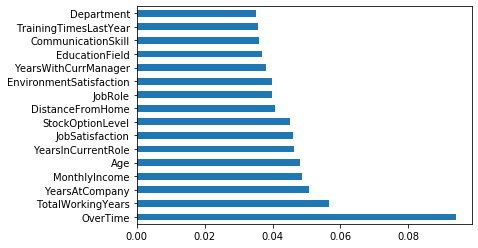

In [16]:
feat_imp= pd.Series(model.feature_importances_,index=X.columns)
feat_imp.nlargest(16).plot(kind='barh')
plt.show()

In [17]:
## Selecting the top features

In [18]:
X=X.loc[:,'DistanceFromHome':'CommunicationSkill']

In [19]:
X.drop(['TrainingTimesLastYear','JobInvolvement','Education','EducationField','Gender','YearsSinceLastPromotion','PerformanceRating'],axis=1,inplace=True)

In [20]:
X.head()

,DistanceFromHome,EnvironmentSatisfaction,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,CommunicationSkill
0,0.035714,0.666667,0.250,1.000000,1.0,0.081885,0.000000,0.0,0.214286,0.000000,0.315789,0.297297,0.388889,0.411765,0.75
1,0.392857,0.666667,0.500,0.666667,0.5,0.192417,1.000000,1.0,0.071429,0.666667,0.184211,0.081081,0.111111,0.058824,0.25
2,0.035714,0.666667,0.875,1.000000,1.0,0.218589,0.444444,0.0,0.357143,0.000000,0.315789,0.243243,0.388889,0.176471,1.00
3,0.821429,0.000000,0.750,1.000000,1.0,0.163191,0.777778,0.0,0.142857,0.000000,0.473684,0.189189,0.388889,0.411765,0.75
4,0.071429,0.666667,0.500,0.666667,0.5,0.443655,0.111111,0.0,0.285714,0.333333,0.263158,0.270270,0.388889,0.470588,0.00


In [21]:
## Train test Split 
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=109)

# Logistic Regression

In [22]:

lg=LogisticRegression()


In [23]:
lg.fit(X_train,y_train)
lg.score(X_test,y_test)

D:\Satya\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7566462167689162

# Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
diss=DecisionTreeClassifier()
diss.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [25]:
diss.score(X_test,y_test)

0.9100204498977505

# SVM 

In [26]:
from sklearn import svm

#Create a svm Classifier
clf= svm.SVC(kernel='rbf') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

D:\Satya\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [27]:
clf.score(X_test,y_test)

0.7607361963190185

# Performance Metrics

In [28]:
## This metrics can evaluate any model
from sklearn.metrics import auc

In [29]:
from sklearn.metrics import confusion_matrix
y_pred=clf.predict(X_train)

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)

444 134 139 422


In [30]:
TPR=tp/(tp+fn)
TNR=tn/(tn+fp)
acc = (tp+tn)/(tp+tn+fp+fn)
precison=tp/(tp+fp)
print('recall=',TPR)
print('specificity=',TNR)
print('accuracy=',acc)
print('precision=',precison)

recall= 0.7522281639928698
specificity= 0.7681660899653979
accuracy= 0.7603160667251976
precision= 0.7589928057553957


In [31]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train,y_pred)

0.7601971269791339

# Importing the test dataset

In [65]:
df1=pd.read_csv('test.csv')

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,...,4,1,5,3,5,2,0,4,5,1
1,2,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,...,4,2,13,4,7,7,5,7,3,1
2,3,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,...,3,2,13,2,7,7,6,7,4,1
3,4,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,...,3,1,8,4,4,3,0,2,5,1
4,5,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,...,3,0,9,5,9,7,0,8,2,1


In [34]:
## Performing the same preprocessing and feature selection that was used for train dataset

In [66]:
df1.dtypes

Id                          int64
Age                         int64
BusinessTravel             object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                     object
JobInvolvement              int64
JobRole                    object
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                   object
PercentSalaryHike           int64
PerformanceRating           int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
CommunicationSkill          int64
Behaviour                   int64
dtype: object

In [68]:
labelencoder= LabelEncoder()
df1['BusinessTravel'] = labelencoder.fit_transform(df1['BusinessTravel'])
df1['Department'] = labelencoder.fit_transform(df1['Department'])
df1['EducationField'] = labelencoder.fit_transform(df1['EducationField'])
df1['Gender'] = labelencoder.fit_transform(df1['Gender'])
df1['JobRole'] = labelencoder.fit_transform(df1['JobRole'])
df1['MaritalStatus'] = labelencoder.fit_transform(df1['MaritalStatus'])
df1['OverTime'] = labelencoder.fit_transform(df1['OverTime'])

In [69]:
X1= df1.drop(['Id','EmployeeNumber'],axis=1)
X1.shape

(470, 26)

In [70]:

scaler =MinMaxScaler()
print(scaler.fit(X1))
X1=scaler.transform(X1)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [71]:
X1=pd.DataFrame(X1) 
X1.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.238095,1.0,0.5,0.285714,0.50,0.6,1.000000,1.0,0.666667,0.750,...,1.0,0.333333,0.125,0.500000,0.125,0.117647,0.000000,0.235294,1.00,0.0
1,0.309524,1.0,1.0,0.178571,0.75,0.6,0.000000,1.0,1.000000,0.875,...,1.0,0.666667,0.325,0.666667,0.175,0.411765,0.333333,0.411765,0.50,0.0
2,0.452381,1.0,0.5,0.178571,0.50,0.6,0.666667,1.0,1.000000,0.750,...,0.0,0.666667,0.325,0.333333,0.175,0.411765,0.400000,0.411765,0.75,0.0
3,0.571429,1.0,0.5,0.000000,0.25,0.2,1.000000,0.0,0.333333,0.500,...,0.0,0.333333,0.200,0.666667,0.100,0.176471,0.000000,0.117647,1.00,0.0
4,0.642857,0.0,0.5,0.107143,0.25,0.2,0.666667,1.0,0.666667,0.250,...,0.0,0.000000,0.225,0.833333,0.225,0.411765,0.000000,0.470588,0.25,0.0


In [72]:
X1.columns= X_copy.columns.values


In [73]:
X1.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,0.238095,1.0,0.5,0.285714,0.50,0.6,1.000000,1.0,0.666667,0.750,...,1.0,0.333333,0.125,0.500000,0.125,0.117647,0.000000,0.235294,1.00,0.0
1,0.309524,1.0,1.0,0.178571,0.75,0.6,0.000000,1.0,1.000000,0.875,...,1.0,0.666667,0.325,0.666667,0.175,0.411765,0.333333,0.411765,0.50,0.0
2,0.452381,1.0,0.5,0.178571,0.50,0.6,0.666667,1.0,1.000000,0.750,...,0.0,0.666667,0.325,0.333333,0.175,0.411765,0.400000,0.411765,0.75,0.0
3,0.571429,1.0,0.5,0.000000,0.25,0.2,1.000000,0.0,0.333333,0.500,...,0.0,0.333333,0.200,0.666667,0.100,0.176471,0.000000,0.117647,1.00,0.0
4,0.642857,0.0,0.5,0.107143,0.25,0.2,0.666667,1.0,0.666667,0.250,...,0.0,0.000000,0.225,0.833333,0.225,0.411765,0.000000,0.470588,0.25,0.0


In [74]:
X1=X1.loc[:,'DistanceFromHome':'CommunicationSkill']

In [75]:
X1.drop(['TrainingTimesLastYear','JobInvolvement','Education','EducationField','Gender','YearsSinceLastPromotion','PerformanceRating'],axis=1,inplace=True)

In [76]:
X1.dtypes

DistanceFromHome           float64
EnvironmentSatisfaction    float64
JobRole                    float64
JobSatisfaction            float64
MaritalStatus              float64
MonthlyIncome              float64
NumCompaniesWorked         float64
OverTime                   float64
PercentSalaryHike          float64
StockOptionLevel           float64
TotalWorkingYears          float64
YearsAtCompany             float64
YearsInCurrentRole         float64
YearsWithCurrManager       float64
CommunicationSkill         float64
dtype: object

# Prediction of Company Attrition

In [77]:
## The model used below for prediction is DecisionTree 
y_pred=diss.predict_proba(X1)

In [79]:
## Prediction of Attrition according to the Id
A= pd.DataFrame(y_pred)
A.columns=['A','B']
C= A[['A','B']].max(axis=1)
C

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
7      1.0
8      1.0
9      1.0
10     1.0
11     1.0
12     1.0
13     1.0
14     1.0
15     1.0
16     1.0
17     1.0
18     1.0
19     1.0
20     1.0
21     1.0
22     1.0
23     1.0
24     1.0
25     1.0
26     1.0
27     1.0
28     1.0
29     1.0
      ... 
440    1.0
441    1.0
442    1.0
443    1.0
444    1.0
445    1.0
446    1.0
447    1.0
448    1.0
449    1.0
450    1.0
451    1.0
452    1.0
453    1.0
454    1.0
455    1.0
456    1.0
457    1.0
458    1.0
459    1.0
460    1.0
461    1.0
462    1.0
463    1.0
464    1.0
465    1.0
466    1.0
467    1.0
468    1.0
469    1.0
Length: 470, dtype: float64

In [80]:
## Adding the Id column to the predicted Attrition
dfcolumns=pd.DataFrame(df1.Id)
submission = pd.concat([dfcolumns,C],axis=1)
submission.columns = ['Id','Attrition']

In [81]:
submission.head()

,Id,Attrition
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0


In [ ]:
## It is used to convert the above dataframe to the .csv format 
submission.to_csv('xgb12.csv')
